# 548 20sp hw0 due 5p Fri Apr 2 on Canvas

This assignment will be graded on participation; so long as you make an effort on each problem and upload a legible pdf to Canvas, you will receive full credit.

**Important:** before you do any work in this Colaboratory notebook, click "File -> Save a copy in Drive ..." and rename the file to something memorable.

# Prof Burden; he/him/his

***Purpose:*** *provide feedback so we can better support your learning; graded solely on participation.*

a. Approximately how many hours did you spend on this assignment?

***Answer:*** n/a

b. Were there specific problems that took much longer than others?

***Answer:*** n/a

c. What class meeting(s) did you participate in this week?

***Answer:*** all :)

d. What timezone(s) were you working in this week?

***Answer:*** Seattle time

# welcome to Linear Multivariable Control

***Purpose:*** *learn more about your background and goals so we can better support your learning; graded solely on participation.*

a. What were you doing before you enrolled in your current degree program?

***Answer:*** prior to joining UW ECE as an Assistant Professor, I was a Postdoc and PhD student at UC Berkeley, and an undergrad at UW EE.

b. What do you want to do after you graduate?

***Answer:*** I'm submitting my tenure package this Spring, so if all goes according to plan I'll be promoted as a tenured Associate Professor starting in Sep 2022.

c. Why did you enroll in this course?

***Answer:*** I have taught this course, and the prerequisite 547, multiple times -- I think these courses are incredibly importand and endlessly interesting.

d. What do you want to learn in this course?

***Answer:*** this might be the last virtual course I teach for the foreseeable future (fingers crossed!), so I hope to learn more about what works and what doesn't in an online-only format.

e. Where did you take graduate-level linear systems theory (547), and what textbook(s) did you use?

***Answer:*** when I took 547 as a UW undergrad we used A Linear Systems Primer by Antsaklis and Michel; when I took the analogous class as a grad student at Berkeley we used Linear System Theory by Callier and Desoer.

f. What is/are your preferred scientific computing tool(s)?  (e.g. Python, Julia, Matlab, ...)

***Answer:*** I use Python; I've dabbled in Julia, and I was a 3rd-level Matlab guru in a previous life :)

g. Log in to Canvas and edit your Profile; add a headshot photo, specify your preferred name and pronouns.

***Answer:*** see my example at https://canvas.uw.edu/about/3510568

# simulation, linearization, visualization

Consider the following continuous-time nonlinear system (CNL) that models a pendulum comprised of a mass $m$ affixed to the end of a massless rigid rod of length $\ell$ whose other end is pinned to a direct-drive DC motor that applies torque $u$ and generates [back-EMF](https://en.wikipedia.org/wiki/Counter-electromotive_force) with constant $b$:
$$m \ell^2 \ddot{q} + m g \sin q = u - b \dot{q}.$$

***Purpose:***  *learn how to simulate a nonlinear system, linearize a nonlinear system at an equilibrium, and compare simulation results from the nonlinear system and its linearization -- these are foundational techniques we will use extensively throughout the quarter.*

(a) *If a constant input torque $u(t) = u_0$ with $|u_0| < m g$ is applied, (CNL) has two equilibria -- in what follows, we will focus on the equilibrium in the angle range $\pm\frac{\pi}{2}$ and denote the equilibrium angle by $q_0(u_0)$.*
***Give an analytic expression for $q_0(u_0)$.***

(b)  *Verify your answer from (a) for $u_0 = \frac{1}{2} m g\ \text{N}$ by simulating (CNL) from initial condition $q(0) = 0\ \text{rad}$, $\dot{q}(0) = 0\ \text{rad/sec}$ for $t = 4\sqrt{\frac{g}{\ell}}\ \text{sec}$ -- use parameter values $m = 1\ \text{kg}$, $\ell = 1\ \text{m}$, $g = 9.81\ \text{m/sec}^2$, $b = 1$.*
***Plot $q$ and $\dot{q}$ versus time, and (separately) plot $\dot{q}$ versus $q$ -- label the axes and include a legend in both plots.***

(c) *Verify your answer from (a) for $u_0 \in \left( \frac{1}{4} m g, \frac{3}{4} m g \right)$ by simulating (CNL) from initial condition $q(0) = 0\ \text{rad}$, $\dot{q}(0) = 0\ \text{rad/sec}$ for $t = 4\sqrt{\frac{g}{\ell}}\ \text{sec}$; let $q(t;u_0)$ denote the angle returned by the simulation at the final time $t$.*
***Plot $q(t;u_0)$ versus $u_0$ and $q_0(u_0)$ versus $u_0$ -- label the axes and include a legend.***

(d) *Linearize (CNL) about the equilibrium $x_0$ from (a) to obtain a continuous-time linear time-invariant system (CLTI)
$$\delta\dot{x} = A(u_0) \delta x + B(u_0) \delta u$$
that approximates (CNL) when $x \approx x_0 + \delta x$, $u \approx u_0 + \delta u$.*
***Give analytic expressions for $A(u_0)$, $B(u_0)$.***

(e) If a constant $\delta u(t) = \delta u_0$ is applied, (CLTI) has one equilibrium, denoted $\delta x_0(\delta u_0)$.
***Give an analytic expression for $\delta x_0(\delta u_0)$.***

(f) *Verify your answer from (e) by simulating (CLTI) with $u_0 = \frac{1}{2} m g\ \text{N}$, $\delta u_0 = \frac{1}{4} m g\ \text{N}$ from initial condition $\delta x(0) = 0$ for $t = 4\sqrt{\frac{g}{\ell}}\ \text{sec}$.*
***Plot $\delta x$ and $\delta x_0(\delta u_0)$ versus time -- label the axes and include a legend.***

(g) *Simulate (CLTI) with $u_0 = \frac{1}{2} m g\ \text{N}$, $\delta u_0 \in \left( -\frac{1}{4} m g, +\frac{1}{4} m g \right)$ from initial condition $\delta x(0) = 0$ for $t = 4\sqrt{\frac{g}{\ell}}\ \text{sec}$ and compare with the result obtained in (c); let $\delta q(t;\delta u_0)$ denote the angle returned by the simulation at the final time $t$.*
***Plot $q_0(u_0) + \delta q_0(\delta u_0)$ versus $u_0 + \delta u_0$ on the plot from (c) -- label the axes and include a legend.***

***Help:***  you may wish to make use of the following numerical simulation algorithm:

In [0]:
def numerical_simulation(f,t,x,t0=0.,dt=1e-4,ut=None,ux=None,utx=None,return_u=False):
  """
  simulate x' = f(t,x,u) 

  input:
    f : R x X x U --> X - vector field
      X - state space (must be vector space)
      U - control input set
    t - scalar - final simulation time
    x - initial condition; element of X

    (optional:)
    t0 - scalar - initial simulation time
    dt - scalar - stepsize parameter
    return_u - bool - whether to return u_

    (only one of:)
    ut : R --> U
    ux : X --> U
    utx : R x X --> U

  output:
    t_ - N array - time trajectory
    x_ - N x X array - state trajectory
    (if return_u:)
    u_ - N x U array - state trajectory
  """
  t_,x_,u_ = [t0],[x],[]
  
  inputs = sum([1 if u is not None else 0 for u in [ut,ux,utx]])
  assert inputs <= 1, "more than one of ut,ux,utx defined"

  if inputs == 0:
    assert not return_u, "no input supplied"
  else:
    if ut is not None:
      u = lambda t,x : ut(t)
    elif ux is not None:
      u = lambda t,x : ux(x)
    elif utx is not None:
      u = lambda t,x : utx(t,x)

  while t_[-1]+dt < t:
    if inputs == 0:
      _t,_x = t_[-1],x_[-1]
      dx = f(t_[-1],x_[-1]) * dt
    else:
      # pdb.set_trace()
      _t,_x,_u = t_[-1],x_[-1],u(t_[-1],x_[-1])
      dx = f(_t,_x,_u) * dt
      u_.append( _u )

    x_.append( _x + dx )
    t_.append( _t + dt )

  if return_u:
    return np.asarray(t_),np.asarray(x_),np.asarray(u_)
  else:
    return np.asarray(t_),np.asarray(x_)

# Setup

In [0]:
# "magic" commands, prefaced with "%", changes settings in the notebook

# this ensures plots are embedded in notebook web page
%matplotlib inline

# pdb = Python debugger, so this command turns the debugger OFF
# %pdb off

# numpy = numerical Python, implements arrays (/ matrices)
import numpy as np
# limit number of decimal places printed for floating-point numbers
np.set_printoptions(precision=3)

# scipy = scientific Python, implements operations on arrays / matrices
import scipy as sp
# linalg = linear algebra, implements eigenvalues, matrix inverse, etc
from scipy import linalg as la
# optimize = optimization, root finding, etc
from scipy import optimize as op

# produce matlab-style plots
import matplotlib as mpl
# increase font size on plots
mpl.rc('font',**{'size':18})
# use LaTeX to render symbols
mpl.rc('text',usetex=False)
# animation
from matplotlib import animation as animation
from IPython.display import HTML
mpl.rc('animation', html='jshtml')
# Matlab-style plotting
import matplotlib.pyplot as plt

# symbolic computation, i.e. computer algebra (like Mathematica, Wolfram Alpha)
import sympy as sym

import pdb

# os = operating system; access OS-level commands
# e.g. create directory, delete file, execute command
# (more platform-independent than "!")
import os

# test whether this is a Colaboratory or Jupyter notebook
try:
  import google.colab
  COLAB = True
  print('Colaboratory Notebook')
except:
  COLAB = False
  print('Jupyter Notebook')

# Colab notebook
if COLAB:
  # pip = Python package manager; "!" means "run at system level"
  !pip install slycot
  !pip install control
  
  # render SymPy equations nicely in Colaboratory Notebook
  def colab_latex_printer(exp,**options):
    from google.colab.output._publish import javascript
    url = "https://cdnjs.cloudflare.com/ajax/libs/mathjax/2.7.3/latest.js?config=default"
    javascript(url=url)
    return sym.printing.latex(exp,**options)
  
  sym.init_printing(use_latex="mathjax",latex_printer=colab_latex_printer)

# Jupyter notebook
else:
  init_printing(use_latex='mathjax')

# Python's Control Systems Toolbox
import control as ctrl

# SciPy module that implements many of the routines in ctrl
from scipy import signal as sig

Colaboratory Notebook


# Solution:
(a) We first transform the second-order nonlinear system given to a first order system. Let $v = \dot{q}$, such that $\dot{v} = \ddot{q}$, and substituting into the second order system given results in:
$$f(x, u) = \left[\begin{array}{c} \dot{q} \\ \dot{v} \end{array}\right] = \left[\begin{array}{c} v \\ \frac{1}{ml^2}(u - bv - mg\sin q) \end{array}\right], $$
where x = (q,v)

The system is at equilibrium when $f(x, u) = 0$ which occurs when $v = 0$ and $u = mg\sin q$. If we restrict the angle range to $\pm\frac{\pi}{2}$, then the equilibrium angle denoted as  $q_0(u_0)$ will be:
$$q_0(u_0) = \sin^{-1} \frac{u_0}{mg}$$


(b) Using $u_0 = \frac{1}{2} m g$, parameters $m = 1\ \text{kg}$, $\ell = 1\ \text{m}$, $g = 9.81\ \text{m/sec}^2$, $b = 1$, and simulating from initial condition $q(0) = 0\ \text{rad}$, $\dot{q}(0) = 0\ \text{rad/sec}$ for $t = 4\sqrt{\frac{g}{\ell}}\ \text{sec}$

q0(u0) = 0.5235987755982989


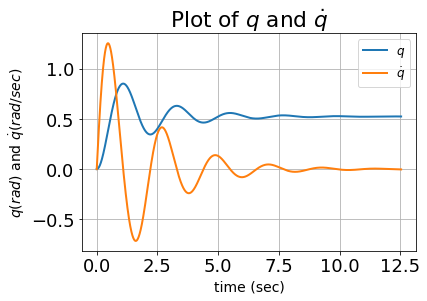

In [0]:
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2
q = 0
dq = 0
x = np.hstack((q,dq))
t = 4 * np.sqrt((g/l))
dt = 1e-4
u0 = 0.5 * m * g

# Constant input
ut = lambda t : u0

def f(t,x,u):
    q, v = x[:1], x[1:] 
    return np.hstack([v, (1/(m * l**2)) * (u - (b * v) - (m * g * np.sin(q)))]) 

t_,x_ = numerical_simulation(f,t,x,dt=dt,ut = ut)

q_u = np.arcsin(u0/(m*g)) # equilibrium angle

print('q0(u0) =',q_u)

plt.plot(t_[:],x_[:,0],linewidth=2,label=r'$q$')
plt.plot(t_[:],x_[:,1],linewidth=2,label=r'$\dot{q}$')
plt.title(r'Plot of $q$ and $\dot{q}$')
plt.ylabel(r'$q(rad)$ and $\dot{q}(rad/sec)$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

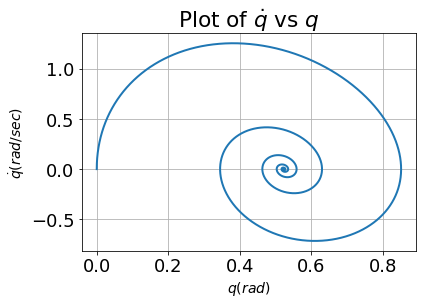

In [0]:
plt.plot(x_[:,0], x_[:,1], linewidth=2)
plt.title(r'Plot of $\dot{q}$ vs $q$')
plt.ylabel(r'$\dot{q}(rad/sec)$',fontsize=14)
plt.xlabel(r'$q(rad)$',fontsize=14)
plt.grid()

(c) Verifying result from (a) by simulating using a range of $u_0 \in \left( \frac{1}{4} m g, \frac{3}{4} m g \right)$

In [0]:
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2
q = 0
dq = 0
x0 = np.hstack((q,dq))
dt = 1e-4
t = 4 * np.sqrt((g/l))
tspan = np.arange(0, t, dt)
u_start = 0.25 * m * g
u_stop = 0.75 * m * g
n_range = 5
uspan = np.linspace(u_start, u_stop, n_range)

def f(t,x,u):
    q, v = x[:1], x[1:] 
    return np.hstack([v, (1/(m * l**2)) * (u - (b * v) - (m * g * np.sin(q)))])

q_array = np.zeros((n_range, len(tspan))) 
qt_end = np.zeros(uspan.size)

for idx in range(n_range):
  # Constant input
  ut = lambda t : uspan[idx]
  t_,x_ = numerical_simulation(f,t,x0,dt=dt,ut=ut)
  q_array[idx, :] = x_[:,0]
  qt_end[idx] = x_[-1,0]

# Analytic Computation
q0_u0 = np.zeros(uspan.size)   
for idx in range(n_range):
  q0_u0[idx] = np.arcsin(uspan[idx]/(m*g)) # equilibrium angle

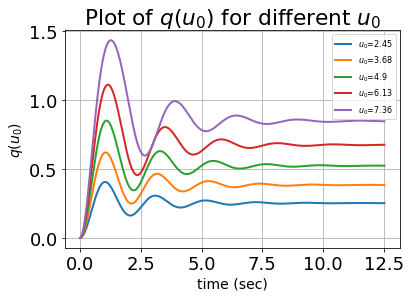

In [0]:
# Plot q0_u0 vs time
for idx in range(n_range):
  plt.plot(t_[:], q_array[idx, :], linewidth=2, label='$u_0$='+str(uspan[idx].round(2)))

plt.title(r'Plot of $q(u_0)$ for different $u_0$')
plt.ylabel(r'$q(u_0)$', fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(fontsize=8)
plt.grid()

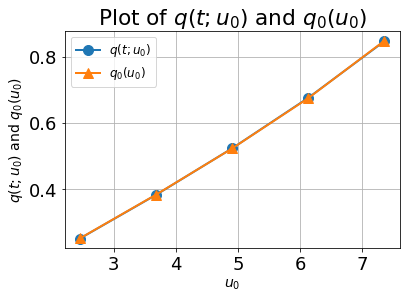

In [0]:
# plot q(t,u_0) vs u_0 and q_0(u_0) vs u_0
plt.plot(uspan,qt_end,linewidth=2,marker='o',markersize=10,label='$q(t;u_0)$')
plt.plot(uspan,q0_u0,linewidth=2,marker='^',markersize=10,label='$q_0(u_0)$')

plt.title(r'Plot of $q(t;u_0)$ and $q_0(u_0)$')
plt.ylabel(r'$q(t;u_0)$ and $q_0(u_0)$',fontsize=14)
plt.xlabel(r'$u_0$',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

(d) To obtain the continuous-time linear time-invariant system (CLTI) from the continuous nonlinear system (CNL), we linearizing the CNL about an equilibrium point. Let x = (q,v), such that:
$$\delta \dot{x}(t) = \underbrace{\frac{\delta f}{\delta x}\bigg\rvert_{\substack{x=x_0\\u=u_0}}}_{A} \delta x (t)+ \underbrace{\frac{\delta f}{\delta u}\bigg\rvert_{\substack{x=x_0\\u=u_0}}}_{B} \delta u(t) .$$

Therefore:
$$A(u_0) 
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta q} &  \frac{\delta f_1}{\delta v}\\ \frac{\delta f_2}{\delta q} &  \frac{\delta f_2}{\delta v} \end{array}\right] 
= 
\left[\begin{array}{c} 0 &  1\\ \frac{-mg \cos q_0(u_0)}{ml^2} &  \frac{-b}{ml^2} \end{array}\right]$$

and
$$B(u_0) 
= 
\left[\begin{array}{c} \frac{\delta f_1}{\delta u} \\ \frac{\delta f_2}{\delta u} \end{array}\right] 
= 
\left[\begin{array}{c} 0 \\ \frac{1}{ml^2} \end{array}\right]$$


(e) If a constant $\delta u(t) = \delta u_0$ is applied to the CLTI resulting in one equilibrium $\delta x_0(\delta u_0)$, then at this equilibrium $\delta \dot{x} = 0$. The analytical expression for $\delta x_0(\delta u_0)$ can therefore be obtained using:
$$0 = A(u_0) \delta x_0 (\delta u_0)+ B(u_0) \delta u_0$$
such that:
$$A(u_0) \delta x_0(\delta u_0) = - B(u_0) \delta u_0.$$
If the matrix A is invertible, then the analytic expression is:
$$\delta x_0(\delta u_0) = - A^{-1}(u_0) B(u_0) \delta u_0.$$


(f) Verifying results from (e)

Given $u_0 = \frac{1}{2} m g$ and $\delta u_0 = \frac{1}{4} m g$ from initial condition $\delta x(0) = 0$ and substituting the parameters in matrix $A(u_0)$ and $B(u_0)$ using $q_0(u_0) = \sin^{-1} \frac{u_0}{mg}$ from (a) results in:
$$A(u_0) 
= 
\left[\begin{array}{c} 0 &  1\\ -8.496 &  -1 \end{array}\right]
\quad \text{and} \quad
B(u_0) 
= 
\left[\begin{array}{c} 0 \\ 1 \end{array}\right]
$$


In [0]:
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2
x0 = np.array([[0.0],[0.0]])
t = 4 * np.sqrt((g/l))
dt = 1e-4
tspan = np.arange(0, t, dt)
u0 = 0.5 * m * g
delta_u0 = 0.25 * m * g
delta_x0 = np.array([[0.0],[0.0]])

# System matrices 
A = np.array([[0.0, 1.0],[-8.496, -1]]) 
B = np.array([[0.0],[1.0]])
C = np.array([1.0, 1.0])
D = np.array([0.0])

# Using control toolbox 
sys = ctrl.ss(A, B, C, D)
t_, y_, x_ = ctrl.forced_response(sys, tspan, delta_u0, delta_x0)

# Analytical equilibrium state
delta_x0_u0 = - np.dot(np.linalg.inv(A), B) * delta_u0  # equilibrium angle
delta_x0_u0_span = delta_x0_u0 * np.ones(tspan.shape)
print('delta_x0(u0)$ =', delta_x0_u0.T)

delta_x0(u0)$ = [[ 0.289 -0.   ]]


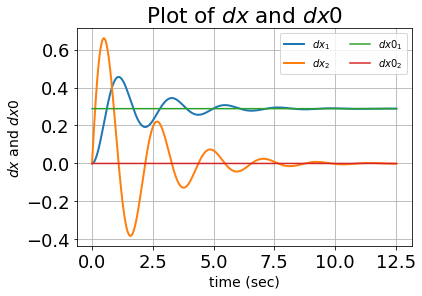

In [0]:
plt.plot(t_[:],x_[0,:],linewidth=2,label=r'$dx_1$')
plt.plot(t_[:],x_[1,:],linewidth=2,label=r'$dx_2$')
plt.plot(t_[:],delta_x0_u0_span[0,:],label=r'$dx0_1$')
plt.plot(t_[:],delta_x0_u0_span[1,:],label=r'$dx0_2$')
plt.title(r'Plot of $dx$ and $dx0$')
plt.ylabel(r'$dx$ and $dx0$',fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(ncol=2, fontsize=10)
plt.grid()


(g) Simulating the CLTI with $u_0 = \frac{1}{2} m g $ and $\delta u_0 \in \left( -\frac{1}{4} m g, +\frac{1}{4} m g \right)$ from initial condition $\delta x(0) = 0$ gives:

In [0]:
m, l, g, b = 1.,1.,9.81, 1. # kg, m, m/sec^2
x0 = np.array([[0.0],[0.0]])
t = 4 * np.sqrt((g/l))
dt = 1e-4
tspan = np.arange(0, t, dt)
u0 = 0.5 * m * g
delta_u0_start = -0.25 * m * g
delta_u0_stop = 0.25 * m * g
n_range = 5
delta_u0_span = np.linspace(delta_u0_start, delta_u0_stop, n_range)
delta_x0 = np.array([[0.0],[0.0]])

# System matrices 
A = np.array([[0.0, 1.0],[-8.496, -1]]) 
B = np.array([[0.0],[1.0]])
C = np.array([1.0, 1.0])
D = np.array([0.0])
sys = ctrl.ss(A, B, C, D)

delta_q_array = np.zeros((n_range, len(tspan))) 
delta_qt_end = np.zeros(delta_u0_span.size)
# Using control toolbox 
for idx in range(n_range):
  t_, y_, x_ = ctrl.forced_response(sys, tspan, delta_u0_span[idx], delta_x0)
  # pdb.set_trace()
  delta_q_array[idx, :] = x_[0, :]
  delta_qt_end[idx] = x_[0, -1]

# Analytical equilibrium state
delta_q0_u0 = np.zeros(delta_u0_span.size) 
for idx in range(n_range):
  delta_q0_u0[idx] = [- np.dot(np.linalg.inv(A), B) * delta_u0_span[idx]][0][0]

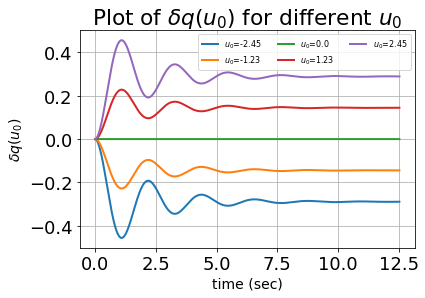

In [0]:
# Plot q0_u0 vs time
for idx in range(n_range):
  plt.plot(t_[:],delta_q_array[idx, :],linewidth=2,label='$u_0$='+str(delta_u0_span[idx].round(2)))

plt.title(r'Plot of $\delta q(u_0)$ for different $u_0$')
plt.ylabel(r'$\delta q(u_0)$', fontsize=14)
plt.xlabel(r'time (sec)',fontsize=14)
plt.legend(fontsize=8, ncol=3)
plt.grid()

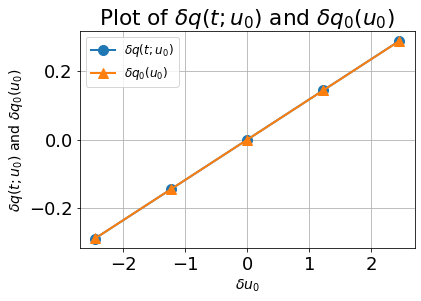

In [0]:
# plot q(t,u_0) vs u_0 and q_0(u_0) vs u_0
plt.plot(delta_u0_span,delta_qt_end,linewidth=2,marker='o',markersize=10,label='$\delta q(t;u_0)$')
plt.plot(delta_u0_span,delta_q0_u0,linewidth=2,marker='^',markersize=10,label='$\delta q_0(u_0)$')

plt.title(r'Plot of $\delta q(t;u_0)$ and $\delta q_0(u_0)$')
plt.ylabel(r'$\delta q(t;u_0)$ and $\delta q_0(u_0)$',fontsize=14)
plt.xlabel(r'$\delta u_0$',fontsize=14)
plt.legend(fontsize=12)
plt.grid()

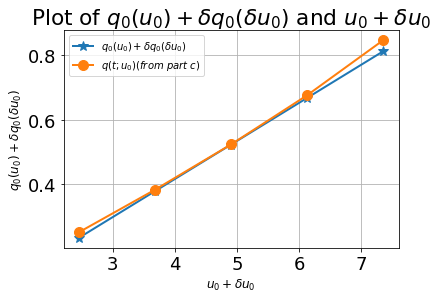

In [0]:
q = q_u + delta_q0_u0
u = u0 + delta_u0_span

plt.plot(u,q,linewidth=2,marker='*',markersize=10,label='$q_0(u_0) + \delta q_0(\delta u_0)$')
plt.plot(uspan,qt_end,linewidth=2,marker='o',markersize=10,label='$q(t;u_0)(from \ part \ c)$')
# plt.plot(uspan,q0_u0,linewidth=2,marker='^',markersize=10,label='$q_0(u_0)$')

# plt.title(r'Plot of $q(t;u_0)$ and $q_0(u_0)$')
# plt.ylabel(r'$q(t;u_0)$ and $q_0(u_0)$',fontsize=14)
# plt.xlabel(r'$u_0$',fontsize=14)
# plt.legend(fontsize=12)
# plt.grid()


plt.title(r'Plot of $q_0(u_0) + \delta q_0(\delta u_0)$ and $u_0 + \delta u_0$')
plt.ylabel(r'$q_0(u_0) + \delta q_0(\delta u_0)$',fontsize=12)
plt.xlabel(r'$u_0 + \delta u_0$',fontsize=12)
plt.legend(fontsize=10)
plt.grid()

About the equilibrium point where $(q_0(u_0), u_0) \approx (0.5, 4.9)$, the linearized equation accurately represents the nonlinear system.